In [3]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'NOx')

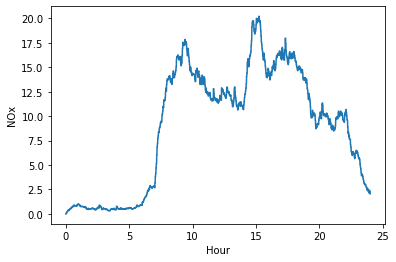

In [8]:
data = pd.read_csv('../outputs/small/backup5/emissions.csv', delimiter=',', engine='python')
#data = pd.read_csv('../outputs/2020-04-17 15:51:45.231760/simulations/2020-04-17 15:51:45.231871/emissions.csv', delimiter=',', engine='python')

#############
#Map small
#Torget - poly_79
#############
#Map main
#Torget - poly_494
#Elgeseter - poly_488
#Bakke kirke - poly_639
#E6 Tiller - 

data_torget_cell = data[data.Cell == 'poly_79']

plt.plot(data_torget_cell.Timestep/3600,data_torget_cell.NOx)
plt.xlabel("Hour")
plt.ylabel("NOx")
#plt.savefig('torget_sim.png',format='png')

([<matplotlib.axis.XTick at 0x7f8c8e4fe198>,
 <a list of 24 Text major ticklabel objects>)

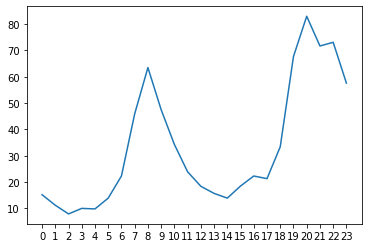

In [122]:
inputFile = open('torvet_2502.json')
data = json.load(inputFile) 
no2 = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    no2[i] = data[0]['values'][i]['value']
    
plt.plot(no2)
plt.xticks(np.arange(len(no2)))

In [4]:
data

[{'zone': 'Trondheim',
  'municipality': 'Trondheim',
  'area': 'Trondheim',
  'station': 'Torvet',
  'eoi': 'NO0089A',
  'component': 'NO2',
  'latitude': 63.43038,
  'longitude': 10.39355,
  'timestep': 3600,
  'isVisible': True,
  'unit': 'µg/m³',
  'values': [{'fromTime': '2020-02-26T00:00:00+01:00',
    'toTime': '2020-02-26T01:00:00+01:00',
    'value': 12.8,
    'qualityControlled': True},
   {'fromTime': '2020-02-26T01:00:00+01:00',
    'toTime': '2020-02-26T02:00:00+01:00',
    'value': 7.9,
    'qualityControlled': True},
   {'fromTime': '2020-02-26T02:00:00+01:00',
    'toTime': '2020-02-26T03:00:00+01:00',
    'value': 10.2,
    'qualityControlled': True},
   {'fromTime': '2020-02-26T03:00:00+01:00',
    'toTime': '2020-02-26T04:00:00+01:00',
    'value': 12.7,
    'qualityControlled': True},
   {'fromTime': '2020-02-26T04:00:00+01:00',
    'toTime': '2020-02-26T05:00:00+01:00',
    'value': 13.2,
    'qualityControlled': True}]}]